In [2]:
!pip install keras tensorflow

# Importando as bibliotecas para cálculos matemáticos, visualização de gráficos, criação do modelo e cálculo de métricas

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# import pandas as pd
# pd.set_option('display.max_columns','None')

In [5]:
(X_train,y_train), (X_test, y_test) = keras.datasets.mnist.load_data() # carregando/baixando o modelo disponível na biblioteca do keras

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


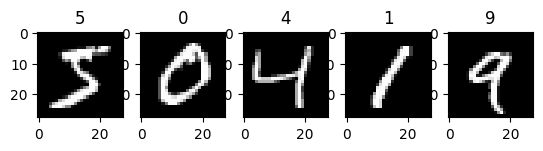

In [6]:
fig, axs = plt.subplots(1,5)
for i in range(5):
    axs[i].imshow(X_train[i], cmap='gray')
    axs[i].title.set_text(f'{y_train[i]}')                 ############# VISUALIZAÇÃO DOS 5 PRIMEIROS NUMEROS DO CONJUNTO DE TREINAMENTO

In [7]:
X_train=X_train.astype(float)/255
X_test=X_test.astype(float)/255              ########### NORMALIZAÇÃO DOS DADOS


In [8]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)           ############ Consertando as dimensões da matrix de (60000, 28, 28) para (60000, 28, 28,1)

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)          ########## ONE HOT ENCODER NOS TARGETS

In [11]:
y_train.shape ######## VISUALIZAÇÃO DO TAMANHO DA MATRIZ

(60000, 10)

In [12]:
model = keras.Sequential( ########### INSTANCIA O MODELO;
    [
        keras.Input(shape=(28,28,1)), ## ENTRADA DO MODELO
        layers.Flatten(), ###### ACHATA A MATRIZ, MULTIPLICANDO 28*28
        layers.Dense(num_classes, activation='softmax')     ##### CAMADA DE SAIDA USANDO A FUNÇÃO SOFTMAX
    ]
)
model.summary() ######## RESUMO AMIGAVEL

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

# COMPILAÇÃO DO MODELO
PREPARANDO PARA TREINAR

In [13]:
batch_size = 128 # Nº DE AMOSTRAS PROCESSADAS
epochs = 30 # EPOCAS -> QNTS VEZES O MODELO VE TODOS OS DADOS DE TREINAMENTO
loss = 'categorical_crossentropy' # TIPO DE FUNÇÃO DE PERDA
optimizer = 'Adam' # OTIMIZADOR UTILIZADO
metric = ['accuracy'] # MÉTRICA DE RETREINAMENTO
model.compile(loss=loss, optimizer=optimizer, metrics=metric) # COMPILAR O MODELO COM OS DADOS CITADOS ANTES

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, stratify=y_train) ########## SEPARAÇÃO EM CONJ DE TREINAMENTO E TESTE

In [15]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape ### VISUALIZACAO DO SHAPE

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [16]:
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,                                                          ############# TREINAMENTO DO MODELO
    validation_data=(X_val,y_val),
    shuffle=True
)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6964 - loss: 1.1393 - val_accuracy: 0.8844 - val_loss: 0.4415
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8949 - loss: 0.4019 - val_accuracy: 0.9011 - val_loss: 0.3625
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9071 - loss: 0.3414 - val_accuracy: 0.9076 - val_loss: 0.3347
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9140 - loss: 0.3139 - val_accuracy: 0.9105 - val_loss: 0.3163
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9181 - loss: 0.2972 - val_accuracy: 0.9144 - val_loss: 0.3065
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9210 - loss: 0.2855 - val_accuracy: 0.9155 - val_loss: 0.2991
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9243 - loss: 0.2729 - val_accuracy: 0.9162 - val_loss: 0.2960
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9233 - loss: 0.2758 - val_accuracy: 0.

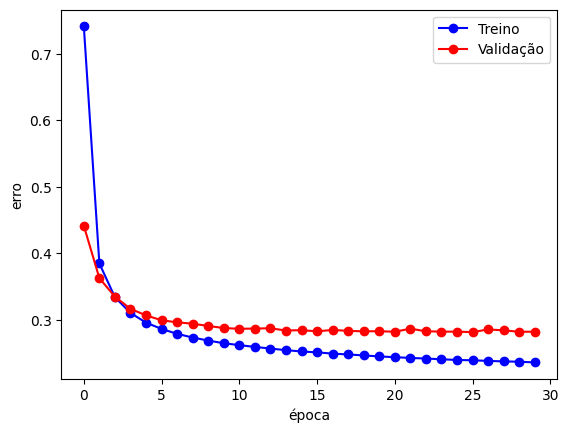

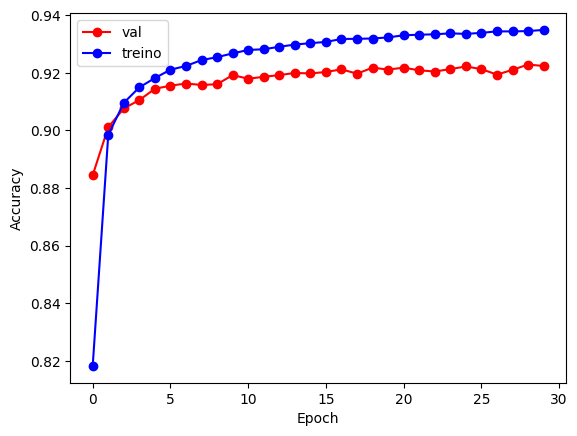

In [17]:
plt.figure()
plt.plot(history.epoch,history.history['loss'], 'o-b', label='Treino')
plt.plot(history.epoch,history.history['val_loss'], 'o-r', label='Validação')

plt.xlabel('época')
plt.ylabel('erro')

plt.legend()                        ########### VISUALIZAÇÃO DOS ERROS E CURVA DE APRENDIZADO DE CADA CONJUNTO (VAL/TREINO)

plt.figure()
plt.plot(history.epoch, history.history['val_accuracy'], 'o-r', label='val')
plt.plot(history.epoch, history.history['accuracy'], 'o-b', label='treino')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


In [18]:
erros = np.array(history.history.get('val_loss'))
np.argmin(erros)                                        ########## ISSO AQUI FOI ALGO A PARTE À AULA. EU FIZ SÓ PRA VISUALIZAR ONDE O MODELO ENCONTRAVA O MENOR
################################################################## ERRO NO CONJUNTO DE VALIDAÇÃO -> EPOCA 26

25

In [19]:
score = model.evaluate(X_test, y_test, verbose=0) ############# AVALIAÇÃO DO MODELO EM CIMA DO CONJUNTO DE TESTE SEPARADO ANTERIORMENTE

In [20]:
y_test_hat = model.predict(X_test) # FAZENDO AS PREVISÕES USANDO O MODELO TREINADO
y_pred = np.argmax(y_test_hat,axis=1) # TRANSFORMA AS PROBABILIDADES DE CADA UM. (SOFTMAX RETORNA PORCENTAGEM DE PROBABILIDADE E
####################################### AQUI A GNT TRANSFORMOU A PROBABILIDADE PARA UM NUMERO. POR EXEMPLO: A PROB DE SER O Nº 1 ERA DE 0.8 (MAIOR DE TODAS), ENTÃO AQUI A SAIDA
######## SE TRANSFORMA EM 1)
y_true = np.argmax(y_test,axis=1) ############ INVERSÃO DO ONE HOT ENCODER

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [21]:
cm = confusion_matrix(y_true,y_pred) ########### CRIANDO A MATRIX DE CONFUSAO

<Axes: >

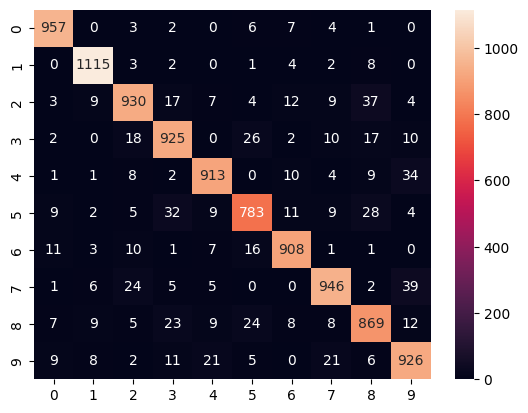

In [22]:
sns.heatmap(cm,annot=True,fmt='.0f') ############ VISUALIZANDO A MATRIX DE CONFUSAO DE FORMA MAIS AMIGAVEL